### Examen de certificación – Intento 2

## Examen de cinturón AML – Opción A

### Descripción del examen:
En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

### Dataset:
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis 


### Instrucciones:
1. Exploración y preprocesamiento de datos:
  - Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  - Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

2. Análisis no supervisado:
 - Selecciona un enfoque de análisis no supervisado: K-means o PCA.
 - K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
 - PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

3. Modelado con MLP:
 - Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
 - Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
 - Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

4. Evaluación del modelo:
 - Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
 - Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

5. Discusión y análisis:
 - Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
 - Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

6. Entrega final:
 - Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

***
### Desarrollo del examen
* Importamos las librerias a utilizar
* Cargamos el dataset

In [31]:
# Importar Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Flag para desactivar los warnings en las cells oputputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Descargamos el dataset indicado para el examen y lo cargamos en una variable
df = pd.read_csv('../data/examen_3_intento_2/marketing_campaign.csv', sep='\t')

# Cantidad de Filas y Columnas
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

# Revisamos las primeras columnas para corroborar que cargo bien el dataset
df.head(5)

Cantidad de filas: 2240
Cantidad de columnas: 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Exploración inicial del dataset
Buscamos conocer:
* Cantidad de filas y columnas
* Tipos de datos de las columnas
* Cantidad de nulos por columna
* Una exploración inicial de las variables estadísticas

In [3]:
# Revisar tipos de datos
print(f'Tipos de Datos de las columnas:\n{df.dtypes}\n')

# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
descripcionDataset = df.describe()
print(f'Distribución estadística de los datos:\n{descripcionDataset}\n')

# Contamos cuantos valores nulos existen por columna
cantNulos =  df.isnull().sum().sum()
print(f'Valores nulos en el Dataset: {cantNulos}\n')

Tipos de Datos de las columnas:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Distribución estadística de los datos:
               

### Según la información del dataSet, las columnas se dividen en 5 diferentes categorias de información:
 1. People: Información de cada cliente
 2. Products: Información relacionada a los productos
 3. Promotion: información acerca de las promociones
 4. Place: Lugar o medio donde el cliente hizo la compra


In [4]:
# Información del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

***
### Conclusiones del análisis preliminar del dataset:
 1. Hay 24 valores nulos en la columna INCOME, que representan el 1.07% de los datos. Por lo que determino eliminar las filas que contengan nulos.
 2. Hay algunas columnas que necesitamos pasar por el proceso de Encoding.
 3. La columna DT_COSTUMER no se reconoce como DATETIME, por lo que tenemos que parsear.
## 
***

In [5]:
# Eliminar todas las filas donde existan valores nulos
df = df.dropna()
print('Total de filas luego de eliminar los valores nulos:', df.shape[0])

Total de filas luego de eliminar los valores nulos: 2216


In [6]:
# Parsear la columna 'DT_COSTUMER' a tipo fecha
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(f'Tipos de Datos de las columna Dt_Customer despues de parsear: {df.dtypes[7]}\n')

Tipos de Datos de las columna Dt_Customer despues de parsear: datetime64[ns]



### Verificamos cual es el primer y último registro de la columna 'Dt_Customer' por fecha
Esto nos va a ayudar a determinar de cuando podemos suponer que se creo el dataset, esto nos va a ayudar a hacer la Ingenieria de características. Por ejemplo para calcular la edad del cliente

In [7]:
fechas = []
for i in df["Dt_Customer"]:
    i = i.date()
    fechas.append(i)  
#Dates of the newest and oldest recorded customer
print("El último usuario registrado en el DataSet: ",max(fechas))
print("El primer usuario registrado en el DataSet:",min(fechas))

El último usuario registrado en el DataSet:  2014-06-29
El primer usuario registrado en el DataSet: 2012-07-30


Con esto, podremos restar el valor de Year_Birth con 2014 para calcular la edad del cliente.

Exploramos los valores de la columna de Marital_Status y Education, que son variables que apriori son importantes

In [8]:
print("Total de Categorias en la columna Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total de Categorias en la columna Education:\n", df["Education"].value_counts())

Total de Categorias en la columna Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total de Categorias en la columna Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


***
### Ingeniería de características
1. Creamos la columna Edad, que calculamos apartir del valor de Year_Birth - 2014
2. Gastos, donde sumaremos todos los montos totales que el usuario gastó
3. Crearemos la columna En_Convivenvia, que sacaremos de la columan Marital_Status para segmentar.
4. Crearemos la columna Hijos, para unificar las columnas kidhome y teenhome
5. Creare la columna Tamanho_familiar, para totalizar cuantas personas viven en una casada
6. Creare la columna Es_Padre, para individualizar a los clientes que son o no padres.
7. Reemplazaremos los valores de la columna Education para simplificar sus valores
8. Eliminaré las columnas que no utilizaré.

In [9]:
#Feature Engineering
#Age of customer today 
df["Edad"] = 2014-df["Year_Birth"]

#Total spendings on various items
df["Gastos"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["En_Convivenvia"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Hijos"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Tamanho_familiar"] = df["En_Convivenvia"].replace({"Alone": 1, "Partner":2})+ df["Hijos"]

#Feature pertaining parenthood
df["Es_Padre"] = np.where(df.Hijos> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [10]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Edad,Gastos,Hijos,Tamanho_familiar,Es_Padre
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,45.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,2525.000000,3.000000,5.000000,1.000000


### Existen 2 columnas donde hay claros outliers:
1. Hay una persona con edad de 121 años
2. Hay un ingreso bastante alejado de la media

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

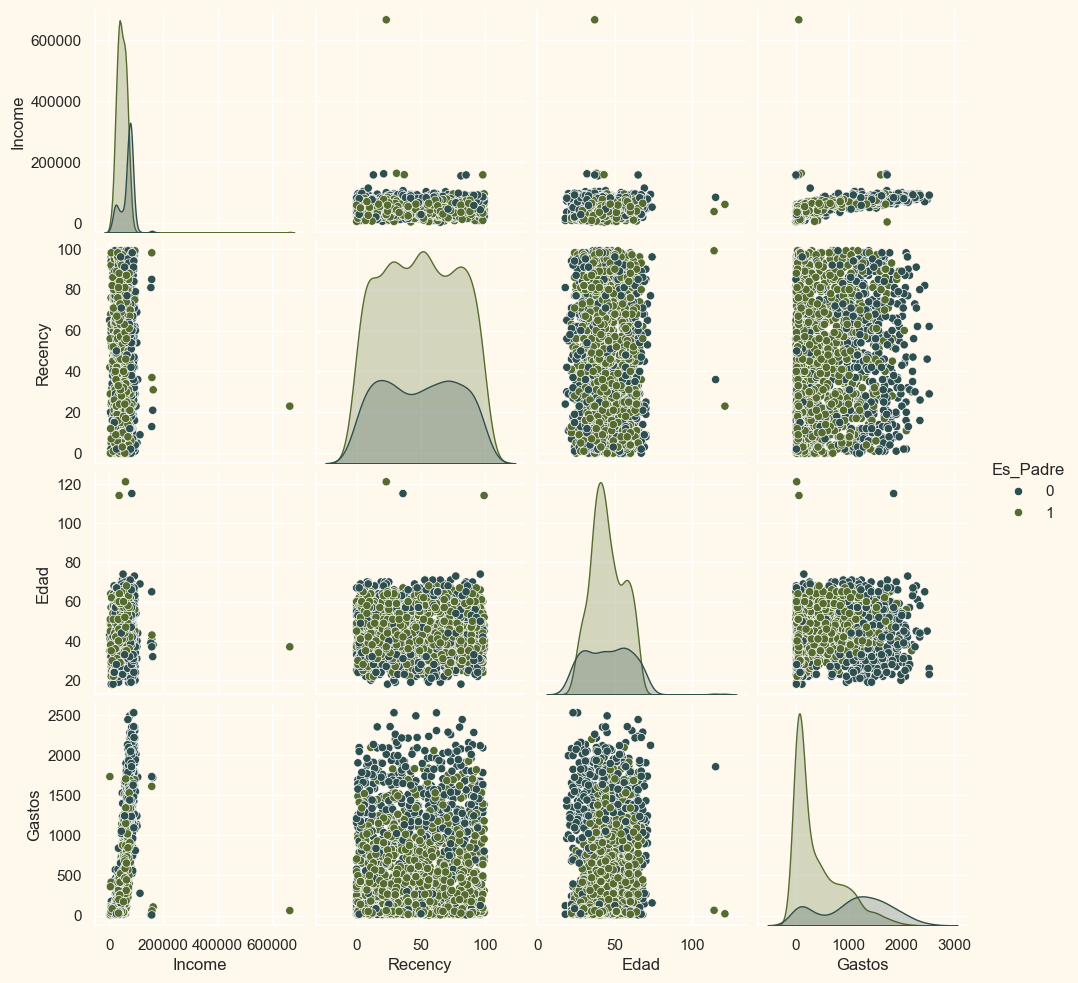

In [11]:
#Setting up colors prefrences
from matplotlib import colors

#To plot some selected features 
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#2F4F4F", "#556B2F", "#8FBC8F", "#DAA520", "#FF8C00", "#4682B4"]
cmap = colors.ListedColormap(["#2F4F4F", "#556B2F", "#8FBC8F", "#DAA520", "#FF8C00", "#4682B4"])

# To plot some selected features
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
# Updating the palette in pairplot
To_Plot = ["Income", "Recency", "Edad", "Gastos", "Es_Padre"]
print("Relative Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(df[To_Plot], hue="Es_Padre", palette=pallet[:2])  # Using first two colors for the hue
plt.show()

Claramente existen datos que son outliers, pero al revisarlos, pertenecen a un porcentaje muy pequeño del dataset, por lo que no son representativos

Entonces, lo que haré será fijar un tope para la edad y para el importe. Los clientes que tengan más de 90 años, serán excluidos del Dataset. Asímismo los que tengan un Income mayor a 600000

In [13]:
#Eliminar outliers que no cumplan con los criterios de edad e ingresos 
df = df[(df["Edad"]<90)]
df = df[(df["Income"]<600000)]
print("El número total de rows del dataset luego de eliminar las columnas:", len(df))

El número total de rows del dataset luego de eliminar las columnas: 2212


Relative Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

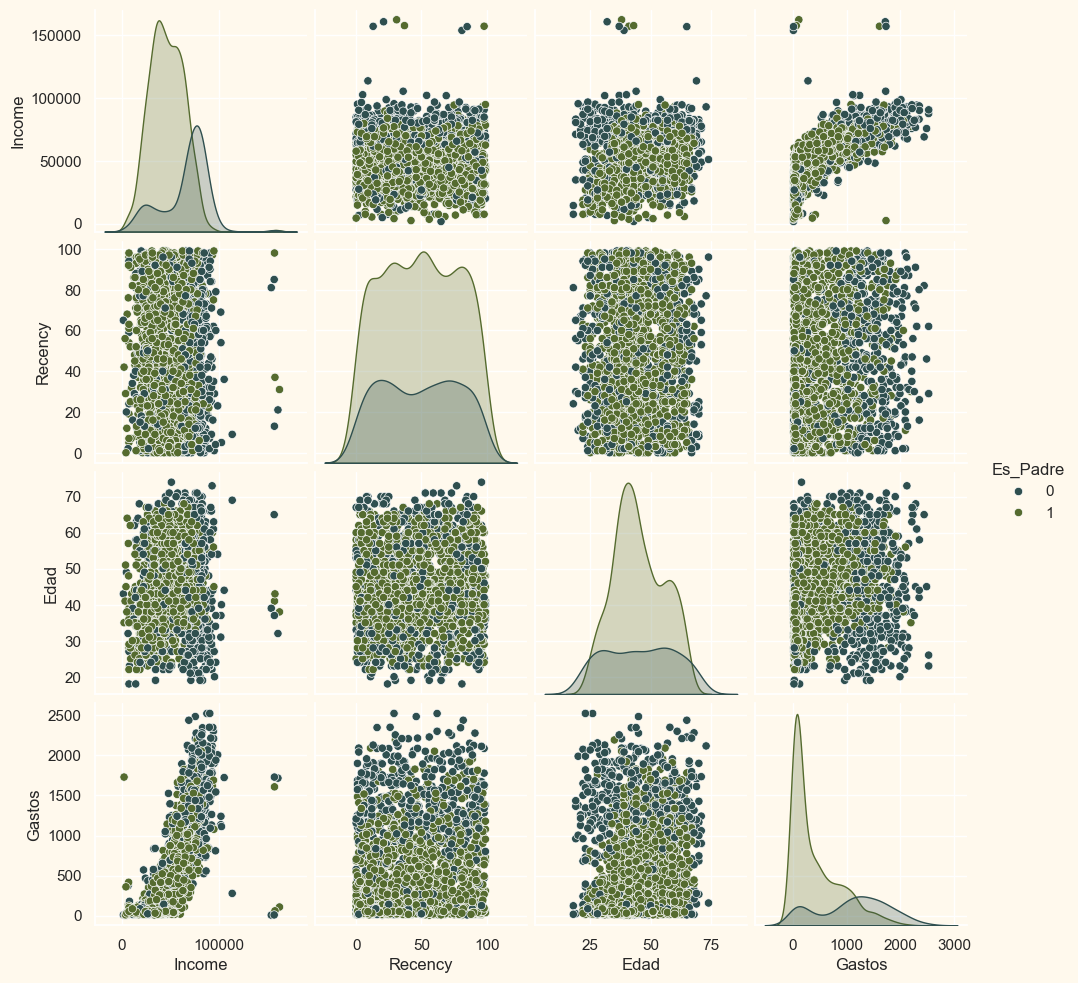

In [14]:
#To plot some selected features 
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#2F4F4F", "#556B2F", "#8FBC8F", "#DAA520", "#FF8C00", "#4682B4"]
cmap = colors.ListedColormap(["#2F4F4F", "#556B2F", "#8FBC8F", "#DAA520", "#FF8C00", "#4682B4"])

# To plot some selected features
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
# Updating the palette in pairplot
To_Plot = ["Income", "Recency", "Edad", "Gastos", "Es_Padre"]
print("Relative Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(df[To_Plot], hue="Es_Padre", palette=pallet[:2])  # Using first two colors for the hue
plt.show()

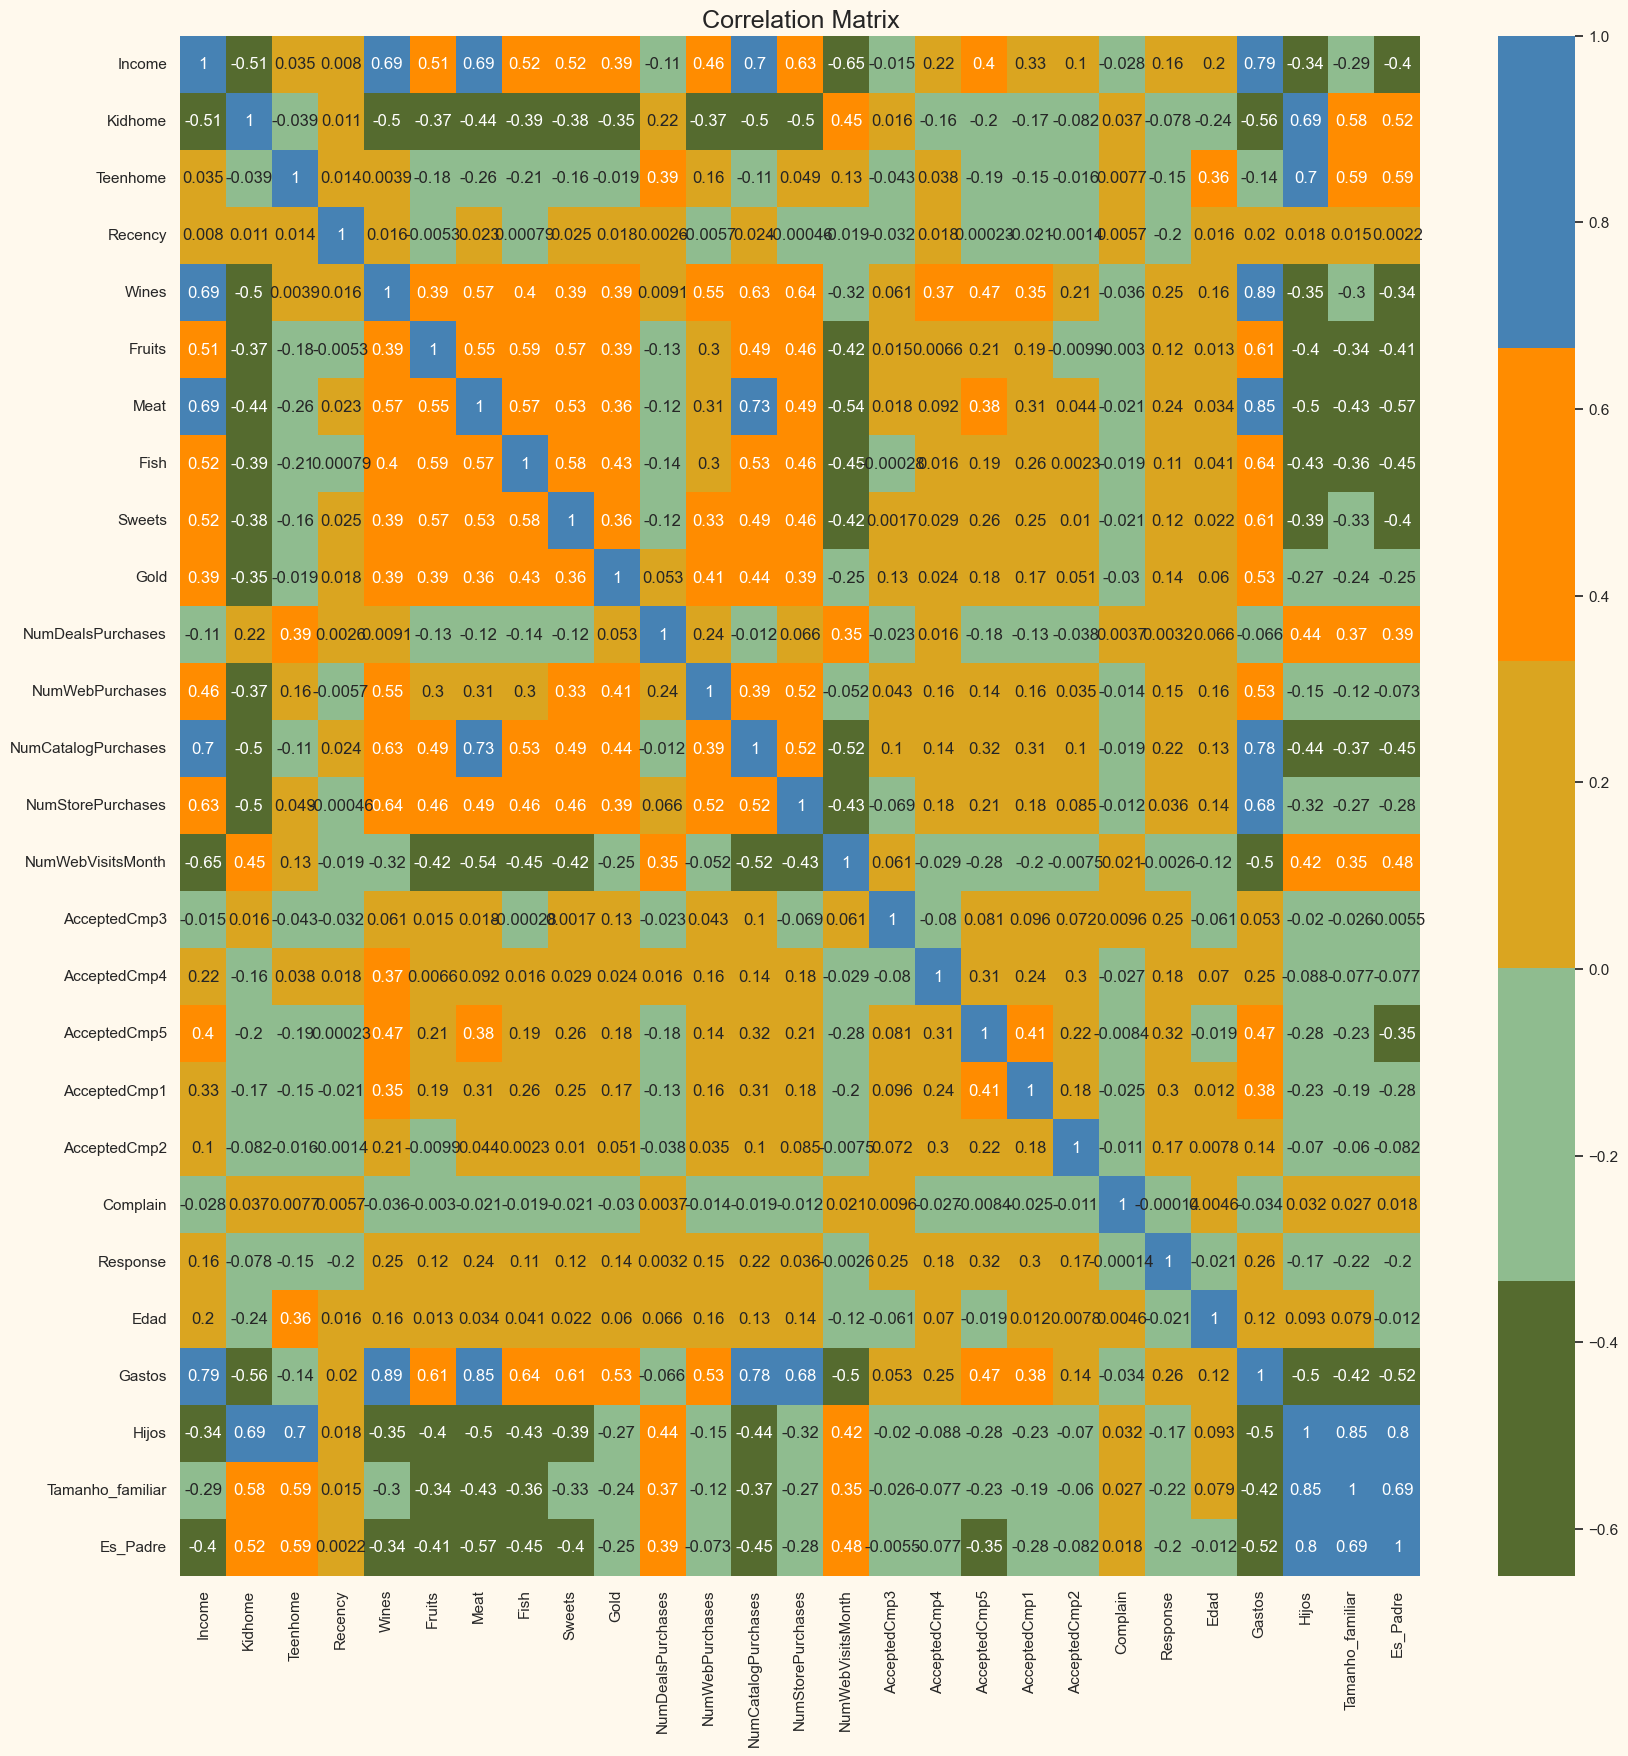

In [20]:
cmap = colors.ListedColormap(["#2F4F4F", "#556B2F", "#8FBC8F", "#DAA520", "#FF8C00", "#4682B4"])

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
corrmat = numeric_df.corr()

# Graficando el heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)  # Aquí puedes cambiar 'coolwarm' por 'cmap'
plt.title("Correlation Matrix", fontsize=18)
plt.show()

Los datos están bastante limpios ahora y aprovechamos para incluir nuevas características.
## 

***
### Preprocesamiento de Datos
En esta parte del examen, voy a preparar los datos para la closterización
1. LabelEncoding para las características categoricas.
2. StandarScaler para las demás características
3. Crearemos un dataset para la reducción de dimensionalidad

In [21]:
# Crearemos una lista de las variables categoricas
categorical = df.select_dtypes(include=['object'])
categorical_list = list(categorical.columns)

print(f'Variables Categoricas:\n{categorical_list}\n')

Variables Categoricas:
['Education', 'En_Convivenvia']



In [22]:
# LabelEncoding para las variables categoricas
label_encoder = LabelEncoder()
for column in categorical_list:
    df[column] = label_encoder.fit_transform(df[column])
    
print("Todas las columnas son numericas ahora:\n", df.dtypes)

Todas las columnas son numericas ahora:
 Education                int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Edad                     int64
Gastos                   int64
En_Convivenvia           int32
Hijos                    int64
Tamanho_familiar         int64
Es_Padre                 int32
dtype: object


In [25]:
# Creamos una copia del DataSet
df_copy = df.copy()

# Creamos un subgrupo de las columnas que no queremos estandarizar
no_escalar = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_copy = df_copy.drop(no_escalar, axis=1)

#Escalamos
scaler = StandardScaler()
scaler.fit(df_copy)
df_scalado = pd.DataFrame(scaler.transform(df_copy), columns=df_copy.columns)

print('DataFrame Escalado.')

DataFrame Escalado.


In [27]:
# DataFrame
print("DataFrame que utilizaremos para modelar:\n", )
df_scalado.head()

DataFrame que utilizaremos para modelar:



,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Edad,Gastos,En_Convivenvia,Hijos,Tamanho_familiar,Es_Padre
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [34]:
#Inicialiar el PCA para disminuir la dimensionalidad
pca = PCA(n_components=3)
pca.fit(df_scalado)
PCA_ds = pd.DataFrame(pca.transform(df_scalado), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,7.709324e-17,3.011925,-6.038929,-2.800607,-0.718288,2.497171,7.542848
col2,2212.0,0.000000e+00,1.737368,-4.370734,-1.374870,-0.132468,1.322847,6.140679
col3,2212.0,-1.525804e-17,1.153946,-4.171856,-0.805990,0.157935,0.885247,3.003740


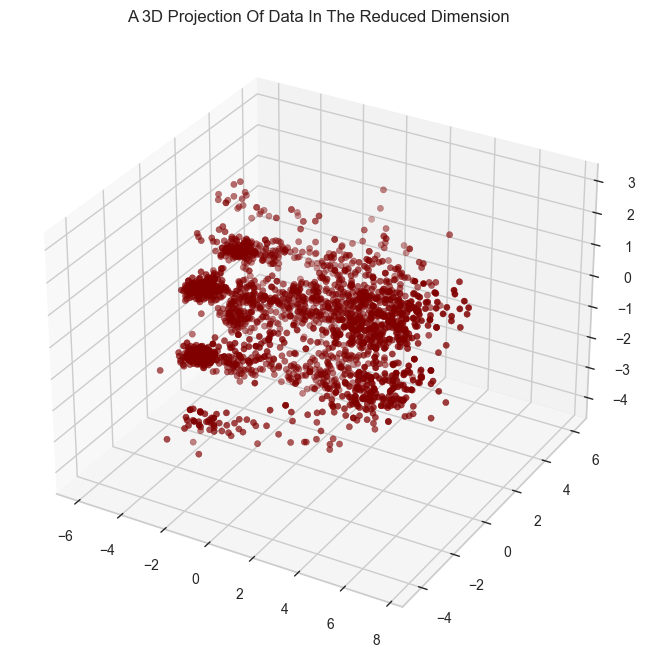

In [35]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

***
### Clusterización

Aplicaremos el metodo del codo para definir cuantos kluster necesitamos

Número de Clusters a utilizar:


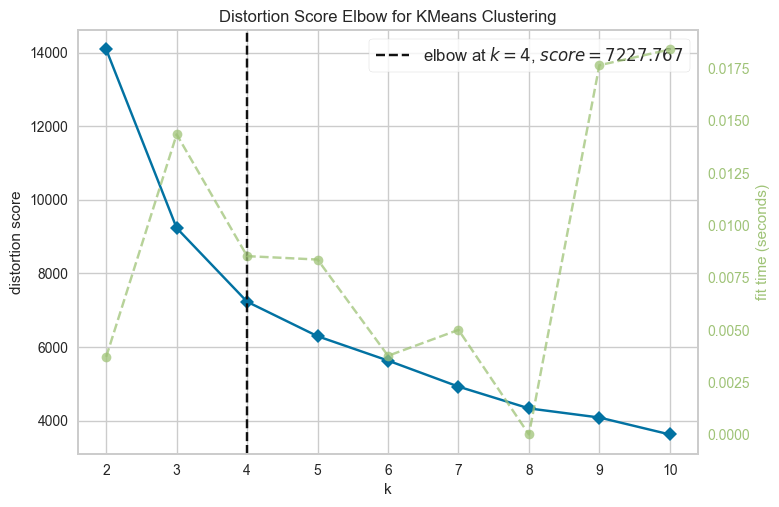

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Aplicaremos el metodo del codo para determinar el numero de clusters a formar
print('Número de Clusters a utilizar:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Esto nos da la respuesta de que el número óptimo de Clusters son 4

In [37]:
# Iniciar el modelo
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

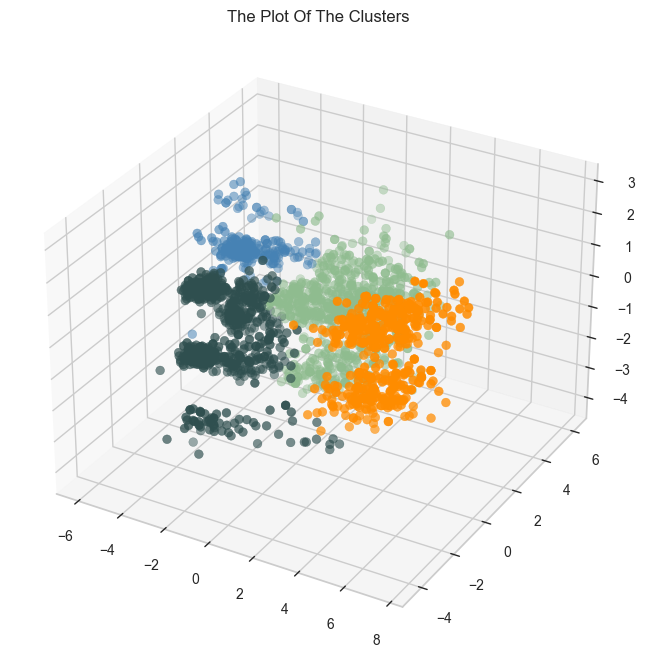

In [38]:
# Para visualizar los clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Como este método es no supervisado, necesitamos las características marcadas para evaluar nuestro modelo. Para eso necesitamos evaluar los datos. Primero miraremos la distribución del cluster

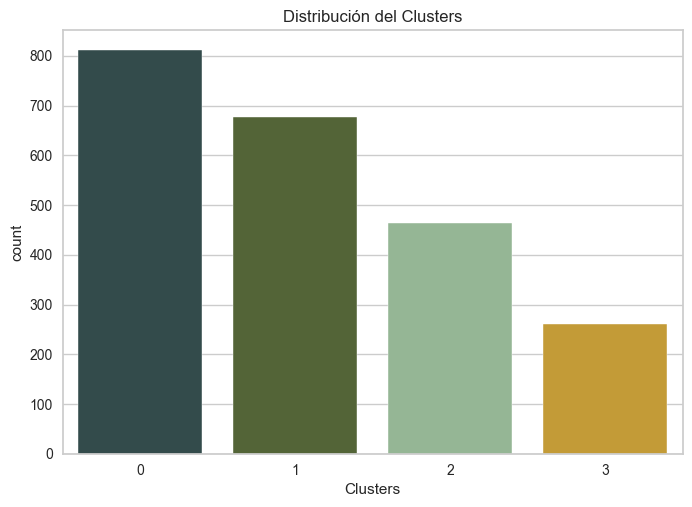

In [41]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pallet)
pl.set_title("Distribución del Clusters")
plt.show()

Están bastante bien distribuidos

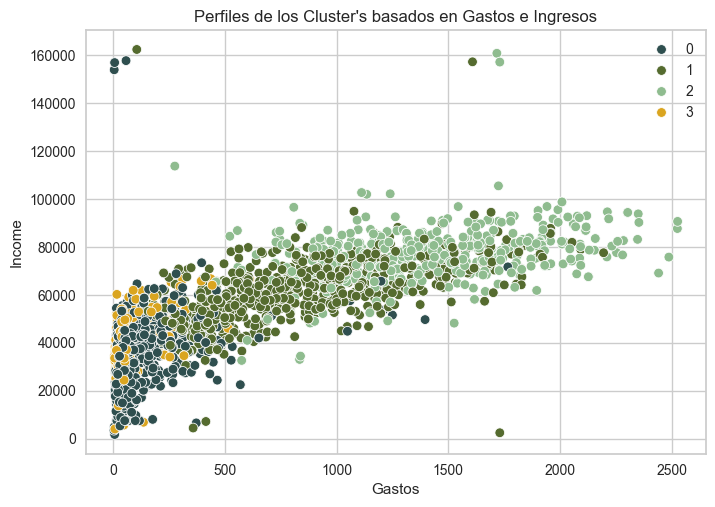

In [42]:
pl = sns.scatterplot(data = df,x=df["Gastos"], y=df["Income"],hue=df["Clusters"], palette= pallet)
pl.set_title("Perfiles de los Cluster's basados en Gastos e Ingresos")
plt.legend()
plt.show()

* Grupo 0: Altos Gastos e ingresos promedio
* Grupo 1: Altos Gastos e ingresos altos
* Grupo 2: Bajo Gatos e ingresos bajos
* Grupo 3: Altos Gastos e ingresos bajos

Veremos la distribución de los clusters dependiendo de los productos

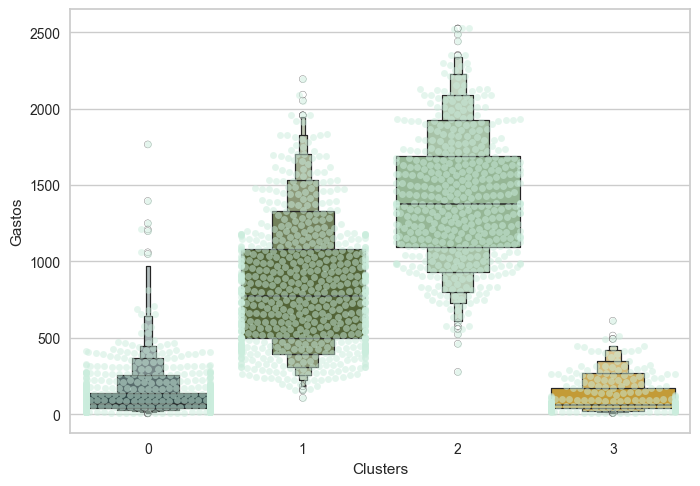

In [44]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Gastos"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Gastos"], palette=pallet)
plt.show()

Claramente podemos ver que el Cluster 2 es el grupo más grande, seguido por el cluster 1.

Veremos cual de los clusters está gastando más por las campañias de marketing

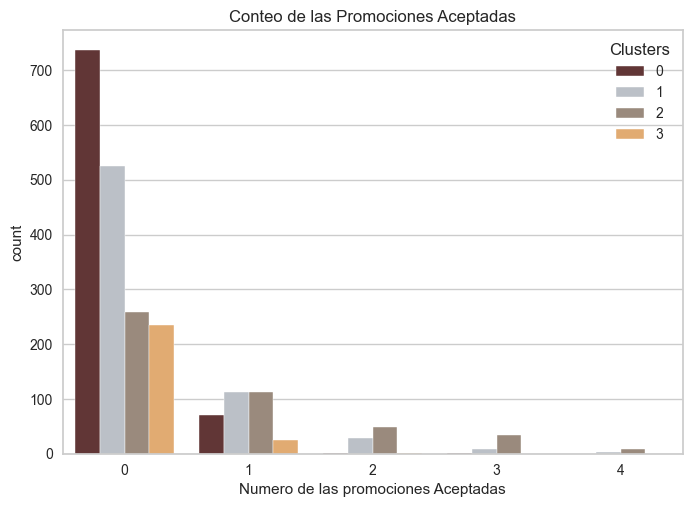

In [46]:
# Crearemos una columna para sumar el total de promociones aceptadas
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
# Plot comparativo de las promociones aceptadas
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Conteo de las Promociones Aceptadas")
pl.set_xlabel("Numero de las promociones Aceptadas")
plt.show()

Hasta ahora no ha habido una respuesta abrumadora a las campañas. Muy pocos participantes en general. Además, ninguna parte abarca los 5. Quizás se requieran campañas mejor orientadas y mejor planificadas para impulsar las ventas.

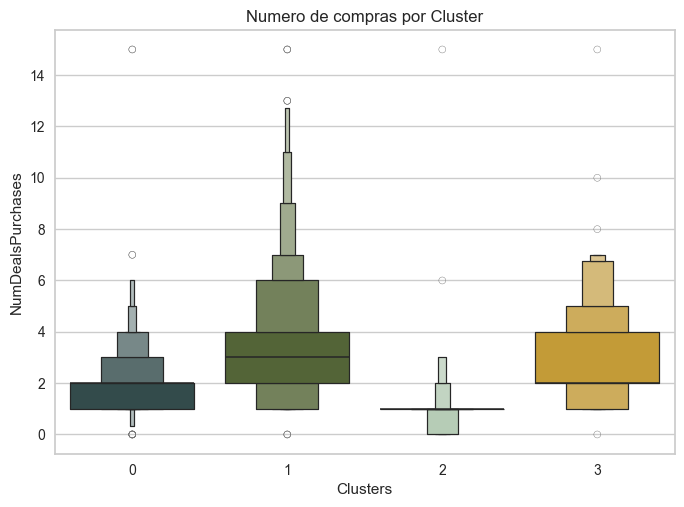

In [47]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pallet)
pl.set_title("Numero de compras por Cluster")
plt.show()

A diferencia de las campañas, las ofertas ofrecidas obtuvieron buenos resultados. Tiene el mejor resultado con el grupo 1 y el grupo 3. Nada parece atraer abrumadoramente al grupo 2


***

### Entrenar un MLp

Como en el dataset no existe una columna que podamos usar como target, crearemos una para cumplir con lo solicitado en el examen siguiendo esta lógica:

Crearemos una columna binaria que indique si un cliente es "propenso a comprar" basado en un umbral específico.
* Si el gasto total (Columna Gastos) supera un umbral de 500, el cliente se considera propenso a comprar
* Si no, se clasifica como no propenso

In [50]:
# Crear una nueva columna "target" basada en un umbral de gastos
threshold = 500
df['target'] = (df['Gastos'] > threshold).astype(int)

In [51]:
# Dividir el dataset en características (X) y objetivo (y)
X = df.drop(columns=['target', 'Gastos'])  # Eliminamos la columna target y Gastos del dataset
y = df['target']

In [52]:
# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirmar las dimensiones de los conjuntos generados
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1769, 30), (443, 30), (1769,), (443,))

La división del dataset se realizó correctamente:
* Conjunto de entrenamiento: 1769 muestras con 30 características.
* Conjunto de prueba: 443 muestras con 30 características.

### Caracteristicas del MLP:
1. Arquitectura inicial:
* Dos capas ocultas.
* Función de activación ReLU.
* Una capa de salida con activación sigmoide para clasificación binaria.
2. Optimizador y función de pérdida:
* Optimizador: Adam.
* Función de pérdida: Entropía cruzada binaria.

In [53]:
# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Capa oculta 1
    Dense(32, activation='relu'),                                         # Capa oculta 2
    Dense(1, activation='sigmoid')                                       # Capa de salida
])

In [54]:
# Compilar el modelo
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [55]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, verbose=0)

# Resultados del entrenamiento
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Evaluacion del modelo

Loss en el conjunto de prueba: 0.0389
Precisión en el conjunto de prueba: 0.9887
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


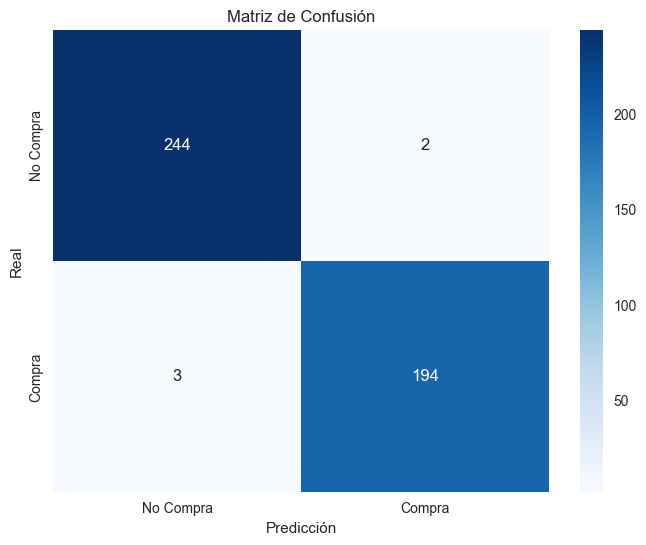


Informe de Clasificación:
              precision    recall  f1-score   support

   No Compra       0.99      0.99      0.99       246
      Compra       0.99      0.98      0.99       197

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443



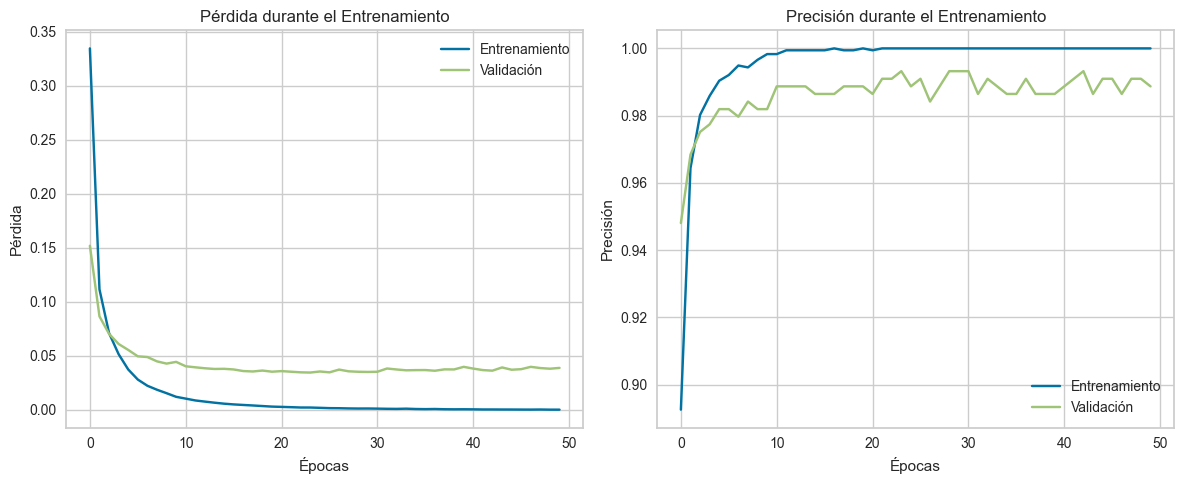

In [56]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Predicciones y matriz de confusión
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Compra", "Compra"], yticklabels=["No Compra", "Compra"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No Compra", "Compra"]))

# Curvas de aprendizaje
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
